In [714]:
import pandas as pd    # Importing pandas for data manipulation
import numpy as np     # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns    # Importing seaborn for statistical data visualization
import plotly.express as px     # Importing plotly for interactive visualizations
import streamlit as st   # Importing streamlit for building dashboards


In [715]:
from sklearn.preprocessing import  OneHotEncoder

In [716]:
import warnings
warnings.filterwarnings('ignore')
# These warnings don’t stop your code, but they make the output messy.

In [717]:
# Grid lines are visible → makes charts easier to read.
sns.set(style="whitegrid")

In [718]:
df=pd.read_csv(r"D:\Studys\GUVI\class project\youtube_ad_revenue_dataset (1).csv")

In [719]:
df

video_id        date  views   likes  comments  watch_time_minutes  \
0       vid_3092  24-09-2024   9936  1221.0     320.0         26497.21418   
1       vid_3459  22-09-2024  10017   642.0     346.0         15209.74744   
2       vid_4784  21-11-2024  10097  1979.0     187.0         57332.65850   
3       vid_4078  28-01-2025  10034  1191.0     242.0         31334.51777   
4       vid_3522  28-04-2025   9889  1858.0     477.0         15665.66643   
...          ...         ...    ...     ...       ...                 ...   
122395  vid_2902  14-12-2024   9853  1673.0     147.0         42075.70489   
122396  vid_3890  13-07-2024  10128  1709.0      63.0         57563.70304   
122397  vid_3934  10-06-2024  10267   700.0       NaN         27549.71466   
122398  vid_4260  22-12-2024  10240  1616.0     106.0         56967.38438   
122399  vid_1056  25-06-2024   9931   770.0       NaN         38466.83714   

        video_length_minutes  subscribers       category   device country  \
0                   2.862137       228086  Entertainment       TV      IN   
1                  23.738069       736015         Gaming   Tablet      CA   
2                  26.200634       240534      Education       TV      CA   
3                  11.770340       434482  Entertainment   Mobile      UK   
4                   6.635854        42030      Education   Mobile      CA   
...                      ...          ...            ...      ...     ...   
122395             25.490195       210818      Education   Tablet      US   
122396             16.229133       878860          Music  Desktop      UK   
122397             23.822365       576756           Tech   Tablet      CA   
122398              7.753099       585138          Music   Mobile      UK   
122399             27.305703       517587           Tech       TV      CA   

        ad_revenue_usd  
0           203.178237  
1           140.880508  
2           360.134007  
3           224.638261  
4           165.514388  
...                ...  
122395      280.986396  
122396      354.612981  
122397      203.643106  
122398      351.525811  
122399      253.842824  

[122400 rows x 12 columns]

In [720]:
df.tail(3)

video_id        date  views   likes  comments  watch_time_minutes  \
122397  vid_3934  10-06-2024  10267   700.0       NaN         27549.71466   
122398  vid_4260  22-12-2024  10240  1616.0     106.0         56967.38438   
122399  vid_1056  25-06-2024   9931   770.0       NaN         38466.83714   

        video_length_minutes  subscribers category  device country  \
122397             23.822365       576756     Tech  Tablet      CA   
122398              7.753099       585138    Music  Mobile      UK   
122399             27.305703       517587     Tech      TV      CA   

        ad_revenue_usd  
122397      203.643106  
122398      351.525811  
122399      253.842824

In [721]:
print(df.shape)           # How many rows & columns?
print(df.info())          # Data types, missing values?
print(df.isnull().sum())  # Missing values?
print(df.duplicated().sum())  # Duplicates?
print(df.describe())      # Summary statistics for numerical columns

(122400, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB
None
video_id                   0
date                       0
views                 

---------------------------------------------------------------------------------------------------------

# EDA

### video_id

In [722]:
print("shape = ",df["video_id"].shape)
print("\ninfo = ",df["video_id"].info())
print("\nisnull = ",df["video_id"].isnull().sum())
print("\ndescribe = ", df["video_id"].describe())
print("\nnunique =",df["video_id"].nunique())
print("\nunique =",df["video_id"].unique())
print("\nvalue_counts =",df['video_id'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: video_id
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count       122400
unique        5000
top       vid_3033
freq            47
Name: video_id, dtype: object

nunique = 5000

unique = ['vid_3092' 'vid_3459' 'vid_4784' ... 'vid_4757' 'vid_3953' 'vid_2224']

value_counts = video_id
vid_3033    47
vid_1725    43
vid_2512    43
vid_4483    42
vid_4840    42
            ..
vid_2214    11
vid_3001    11
vid_981     11
vid_3847    11
vid_1629    10
Name: count, Length: 5000, dtype: int64


### category

In [723]:
print("shape = ",df["category"].shape)
print("\ninfo = ",df["category"].info())
print("\nisnull = ",df["category"].isnull().sum())
print("\ndescribe = ", df["category"].describe())
print("\nnunique =",df["category"].nunique())
print("\nunique =",df["category"].unique())
print("\nvalue_counts =",df['category'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: category
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count        122400
unique            6
top       Education
freq          20514
Name: category, dtype: object

nunique = 6

unique = ['Entertainment' 'Gaming' 'Education' 'Music' 'Tech' 'Lifestyle']

value_counts = category
Education        20514
Music            20475
Tech             20444
Entertainment    20411
Gaming           20359
Lifestyle        20197
Name: count, dtype: int64


### device

In [724]:
print("shape = ",df["device"].shape)
print("\ninfo = ",df["device"].info())
print("\nisnull = ",df["device"].isnull().sum())
print("\ndescribe = ", df["device"].describe())
print("\nnunique =",df["device"].nunique())
print("\nunique =",df["device"].unique())
print("\nvalue_counts =",df['device'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: device
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count     122400
unique         4
top           TV
freq       30646
Name: device, dtype: object

nunique = 4

unique = ['TV' 'Tablet' 'Mobile' 'Desktop']

value_counts = device
TV         30646
Mobile     30598
Tablet     30579
Desktop    30577
Name: count, dtype: int64


### Country	

In [725]:
print("shape = ",df["country"].shape)
print("\ninfo = ",df["country"].info())
print("\nisnull = ",df["country"].isnull().sum())
print("\ndescribe = ", df["country"].describe())
print("\nnunique =",df["country"].nunique())
print("\nunique =",df["country"].unique())
print("\nvalue_counts =",df['country'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: country
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count     122400
unique         6
top           CA
freq       20603
Name: country, dtype: object

nunique = 6

unique = ['IN' 'CA' 'UK' 'US' 'DE' 'AU']

value_counts = country
CA    20603
DE    20582
IN    20564
AU    20313
UK    20269
US    20069
Name: count, dtype: int64


### Date

In [726]:
print("shape = ",df["date"].shape)
print("\ninfo = ",df["date"].info())
print("\nisnull = ",df["date"].isnull().sum())
print("\ndescribe = ", df["date"].describe())
print("\nnunique =",df["date"].nunique())
print("\nunique =",df["date"].unique())
print("\nvalue_counts =",df['date'].value_counts())


shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: date
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count         122400
unique           365
top       03-04-2025
freq             382
Name: date, dtype: object

nunique = 365

unique = ['24-09-2024' '22-09-2024' '21-11-2024' '28-01-2025' '28-04-2025'
 '31-03-2025' '10-12-2024' '05-04-2025' '17-02-2025' '16-04-2025'
 '05-01-2025' '08-01-2025' '11-06-2024' '16-05-2025' '01-02-2025'
 '19-05-2025' '08-03-2025' '16-03-2025' '27-07-2024' '18-01-2025'
 '27-11-2024' '25-03-2025' '03-12-2024' '12-06-2024' '02-06-2025'
 '17-05-2025' '17-03-2025' '31-01-2025' '22-11-2024' '22-01-2025'
 '02-11-2024' '26-01-2025' '22-05-2025' '23-05-2025' '10-09-2024'
 '01-01-2025' '26-06-2024' '04-07-2024' '30-01-2025' '27-10-2024'
 '23-12-2024' '26-07-2024' '20-12-2024' '24-07-2024' '13-07-2024'
 '02

### views

In [727]:
print("shape = ",df["views"].shape)
print("\ninfo = ",df["views"].info())
print("\nisnull = ",df["views"].isnull().sum())
print("\ndescribe = ", df["views"].describe())
print("\nnunique =",df["views"].nunique())
print("\nskew = ",df['views'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: views
Non-Null Count   Dtype
--------------   -----
122400 non-null  int64
dtypes: int64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean       9999.856283
std          99.881260
min        9521.000000
25%        9933.000000
50%       10000.000000
75%       10067.000000
max       10468.000000
Name: views, dtype: float64

nunique = 736

skew =  -0.0027575163145067464


## likes 

In [728]:
print("shape = ",df["likes"].shape)
print("\ninfo = ",df["likes"].info())
print("\nisnull = ",df["likes"].isnull().sum())
print("\ndescribe = ", df["likes"].describe())
print("\nnunique =",df["likes"].nunique())
print("\nskew = ",df['likes'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: likes
Non-Null Count   Dtype  
--------------   -----  
116283 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  6117

describe =  count    116283.000000
mean       1099.633618
std         519.424089
min         195.000000
25%         650.000000
50%        1103.000000
75%        1547.000000
max        2061.000000
Name: likes, dtype: float64

nunique = 1855

skew =  -0.0027579035972128923


### Comments

In [729]:
print("shape = ",df["comments"].shape)
print("\ninfo = ",df["comments"].info())
print("\nisnull = ",df["comments"].isnull().sum())
print("\ndescribe = ", df["comments"].describe())
print("\nnunique =",df["comments"].nunique())
print("\nskew = ",df['comments'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: comments
Non-Null Count   Dtype  
--------------   -----  
116288 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  6112

describe =  count    116288.000000
mean        274.396636
std         129.741739
min          48.000000
25%         162.000000
50%         274.000000
75%         387.000000
max         515.000000
Name: comments, dtype: float64

nunique = 466

skew =  0.007735157212128024


### watch_time_minutes

In [730]:
print("shape = ",df["watch_time_minutes"].shape)
print("\ninfo = ",df["watch_time_minutes"].info())
print("\nisnull = ",df["watch_time_minutes"].isnull().sum())
print("\ndescribe = ", df["watch_time_minutes"].describe())
print("\nnunique =",df["watch_time_minutes"].nunique())
print("\nskew = ",df['watch_time_minutes'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: watch_time_minutes
Non-Null Count   Dtype  
--------------   -----  
116295 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  6105

describe =  count    116295.000000
mean      37543.827721
std       12987.724246
min       14659.105560
25%       26366.320565
50%       37531.990340
75%       48777.782090
max       61557.670090
Name: watch_time_minutes, dtype: float64

nunique = 113999

skew =  0.0009027191355995861


### video_length_minutes

In [731]:
print("shape = ",df["video_length_minutes"].shape)
print("\ninfo = ",df["video_length_minutes"].info())
print("\nisnull = ",df["video_length_minutes"].isnull().sum())
print("\ndescribe = ", df["video_length_minutes"].describe())
print("\nnunique =",df["video_length_minutes"].nunique())
print("\nskew = ",df['video_length_minutes'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: video_length_minutes
Non-Null Count   Dtype  
--------------   -----  
122400 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean         16.014165
std           8.083790
min           2.000142
25%           9.004695
50%          16.005906
75%          23.021260
max          29.999799
Name: video_length_minutes, dtype: float64

nunique = 119999

skew =  -0.0014930598908294045


### Subscribers

In [732]:
print("shape = ",df["subscribers"].shape)
print("\ninfo = ",df["subscribers"].info())
print("\nisnull = ",df["subscribers"].isnull().sum())
print("\ndescribe = ", df["subscribers"].describe())
print("\nnunique =",df["subscribers"].nunique())
print("\nskew = ",df['subscribers'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: subscribers
Non-Null Count   Dtype
--------------   -----
122400 non-null  int64
dtypes: int64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean     502191.719902
std      288397.470103
min        1005.000000
25%      252507.500000
50%      503465.500000
75%      752192.000000
max      999997.000000
Name: subscribers, dtype: float64

nunique = 113254

skew =  -0.008933723924753037


### Ad_Revenue_Usd

In [733]:
print("shape = ",df["ad_revenue_usd"].shape)
print("\ninfo = ",df["ad_revenue_usd"].info())
print("\nisnull = ",df["ad_revenue_usd"].isnull().sum())
print("\ndescribe = ", df["ad_revenue_usd"].describe())
print("\nnunique =",df["ad_revenue_usd"].nunique())
print("\nskew = ",df['ad_revenue_usd'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: ad_revenue_usd
Non-Null Count   Dtype  
--------------   -----  
122400 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean        252.727210
std          61.957052
min         126.590603
25%         199.902018
50%         252.749699
75%         305.597518
max         382.768254
Name: ad_revenue_usd, dtype: float64

nunique = 119993

skew =  0.0004468697830447081


### EDA - look at pattterns 

In [734]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

In [735]:
categorical_cols = [['category', 'device', 'country',]]
numerical_cols = [['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd','year','month','dayofweek']]

### Histograms(Univariate Analysis)

In [736]:
"""for col in numerical_cols[0]:
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()"""

'for col in numerical_cols[0]:\n    sns.histplot(df[col], bins=50, kde=True)\n    plt.title(f"{col} Distribution")\n    plt.show()'

### Boxplots → detect outliers(Univariate Analysis)

In [737]:
"""for col in numerical_cols[0]:
    sns.boxplot(df[col])
    plt.title(f"{col} Distribution")
    plt.show()"""

'for col in numerical_cols[0]:\n    sns.boxplot(df[col])\n    plt.title(f"{col} Distribution")\n    plt.show()'

### Correlation heatmap (Bivariate Analysis)

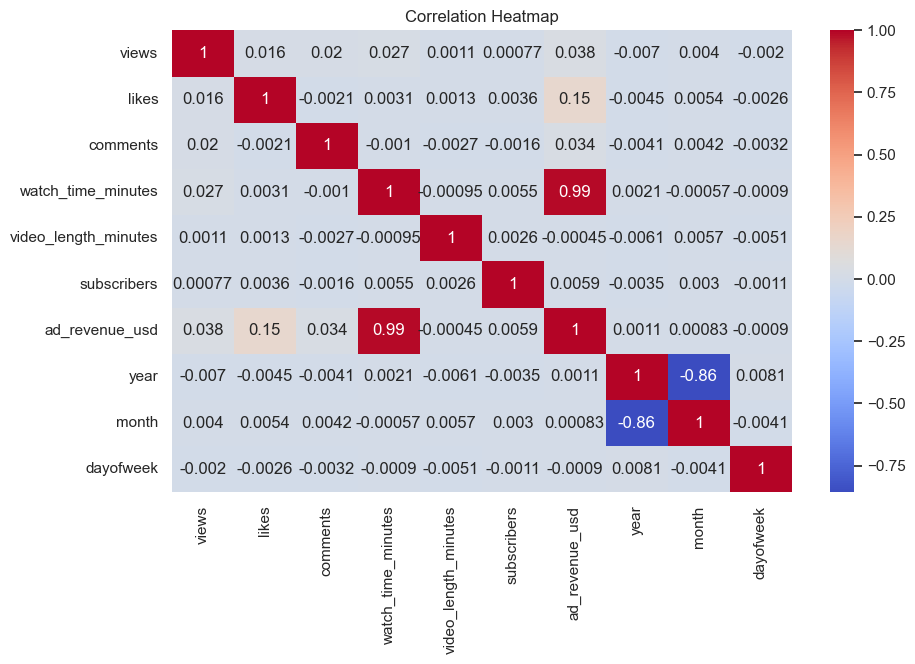

In [738]:

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Scatter plots (Bivariate Analysis:)

In [739]:
"""for col in numerical_cols[0]:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[col], df['ad_revenue_usd'], alpha=0.5)
    plt.title(f"{col} vs Ad Revenue")
    plt.xlabel(col)
    plt.ylabel("Ad Revenue (USD)")
    plt.show()"""

'for col in numerical_cols[0]:\n    plt.figure(figsize=(8, 5))\n    plt.scatter(df[col], df[\'ad_revenue_usd\'], alpha=0.5)\n    plt.title(f"{col} vs Ad Revenue")\n    plt.xlabel(col)\n    plt.ylabel("Ad Revenue (USD)")\n    plt.show()'

### Group analysis

In [740]:
corr_target=df.corr(numeric_only=True)['ad_revenue_usd'].sort_values(ascending=False)
print(corr_target)

ad_revenue_usd          1.000000
watch_time_minutes      0.988874
likes                   0.146449
views                   0.038497
comments                0.034274
subscribers             0.005907
year                    0.001119
month                   0.000834
video_length_minutes   -0.000446
dayofweek              -0.000895
Name: ad_revenue_usd, dtype: float64


In [741]:
for col in categorical_cols:
    print(f"\n---- {col} ----")
    print(df.groupby(col)['ad_revenue_usd'].mean().sort_values())


---- ['category', 'device', 'country'] ----
category       device  country
Education      TV      IN         246.969117
Entertainment  TV      IN         248.059989
Lifestyle      Mobile  US         248.097192
Music          Tablet  CA         248.226241
Lifestyle      Tablet  US         248.805485
                                     ...    
Gaming         Tablet  US         258.072410
               Mobile  CA         258.112824
                       IN         258.148367
Tech           TV      AU         258.176059
               Mobile  CA         258.476564
Name: ad_revenue_usd, Length: 144, dtype: float64


In [742]:
"""import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    # categorical_cols is a nested list, so flatten it first
    if isinstance(categorical_cols[0], list):
        cat_cols = categorical_cols[0]
    else:
        cat_cols = categorical_cols

    for col in cat_cols:
        if col in df.columns:
            plt.figure(figsize=(8,4))
            order = df.groupby(col)['ad_revenue_usd'].mean().sort_values().index
            sns.barplot(x=df[col], y=df['ad_revenue_usd'], order=order)
            plt.title(f"{col} vs Average ad_revenue_usd")
            plt.xticks(rotation=45)
            plt.show()
    break  # Prevents outer loop from running multiple times"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\n\nfor col in categorical_cols:\n    # categorical_cols is a nested list, so flatten it first\n    if isinstance(categorical_cols[0], list):\n        cat_cols = categorical_cols[0]\n    else:\n        cat_cols = categorical_cols\n\n    for col in cat_cols:\n        if col in df.columns:\n            plt.figure(figsize=(8,4))\n            order = df.groupby(col)[\'ad_revenue_usd\'].mean().sort_values().index\n            sns.barplot(x=df[col], y=df[\'ad_revenue_usd\'], order=order)\n            plt.title(f"{col} vs Average ad_revenue_usd")\n            plt.xticks(rotation=45)\n            plt.show()\n    break  # Prevents outer loop from running multiple times'

In [743]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in ['category', 'device', 'country']:
    model = ols(f'ad_revenue_usd ~ C({col})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\n---- {col} ----")
    print(anova_table)

# If p-value < 0.05, then the feature has a significant relationship with target.
# If p-value > 0.05, then it’s probably not useful.


---- category ----
                   sum_sq        df         F   PR(>F)
C(category)  4.219960e+04       5.0  2.198761  0.05151
Residual     4.698079e+08  122394.0       NaN      NaN

---- device ----
                 sum_sq        df         F    PR(>F)
C(device)  2.205625e+04       3.0  1.915308  0.124654
Residual   4.698281e+08  122396.0       NaN       NaN

---- country ----
                  sum_sq        df         F    PR(>F)
C(country)  7.548195e+03       5.0  0.393261  0.853786
Residual    4.698426e+08  122394.0       NaN       NaN


#### Data Cleaning & Preprocessing

In [744]:
# Drop duplicates (~2%)
df = df.drop_duplicates()

# Fill engagement (likes, comments) with 0
df['likes'] = df['likes'].fillna(0)
df['comments'] = df['comments'].fillna(0)

# Fill watch_time_minutes with median
df['watch_time_minutes'] = df['watch_time_minutes'].fillna(df['watch_time_minutes'].median())


In [745]:
df.loc[
    (df['views'] == 0) & 
    (df['likes'] == 0) & 
    (df['comments'] == 0) & 
    (df['watch_time_minutes'] == 0), 
    'ad_revenue_usd'
] = 0.0

In [746]:
df.drop(['video_id', 'date'], axis=1, inplace=True)

### Feature Engineering


In [747]:
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

In [748]:
df.drop(columns=['video_length_minutes' ,'month','year','dayofweek'],axis=1,inplace=True)

In [749]:
corr_target=df.corr(numeric_only=True)['ad_revenue_usd'].sort_values(ascending=False)
print(corr_target)

ad_revenue_usd        1.000000
watch_time_minutes    0.964052
engagement_rate       0.131231
likes                 0.128878
views                 0.037942
comments              0.028335
subscribers           0.005065
Name: ad_revenue_usd, dtype: float64


In [750]:
df

views   likes  comments  watch_time_minutes  subscribers  \
0        9936  1221.0     320.0         26497.21418       228086   
1       10017   642.0     346.0         15209.74744       736015   
2       10097  1979.0     187.0         57332.65850       240534   
3       10034  1191.0     242.0         31334.51777       434482   
4        9889  1858.0     477.0         15665.66643        42030   
...       ...     ...       ...                 ...          ...   
122395   9853  1673.0     147.0         42075.70489       210818   
122396  10128  1709.0      63.0         57563.70304       878860   
122397  10267   700.0       0.0         27549.71466       576756   
122398  10240  1616.0     106.0         56967.38438       585138   
122399   9931   770.0       0.0         38466.83714       517587   

             category   device country  ad_revenue_usd  engagement_rate  
0       Entertainment       TV      IN      203.178237         0.155093  
1              Gaming   Tablet      CA      140.880508         0.098632  
2           Education       TV      CA      360.134007         0.214519  
3       Entertainment   Mobile      UK      224.638261         0.142814  
4           Education   Mobile      CA      165.514388         0.236121  
...               ...      ...     ...             ...              ...  
122395      Education   Tablet      US      280.986396         0.184715  
122396          Music  Desktop      UK      354.612981         0.174961  
122397           Tech   Tablet      CA      203.643106         0.068180  
122398          Music   Mobile      UK      351.525811         0.168164  
122399           Tech       TV      CA      253.842824         0.077535  

[120000 rows x 10 columns]

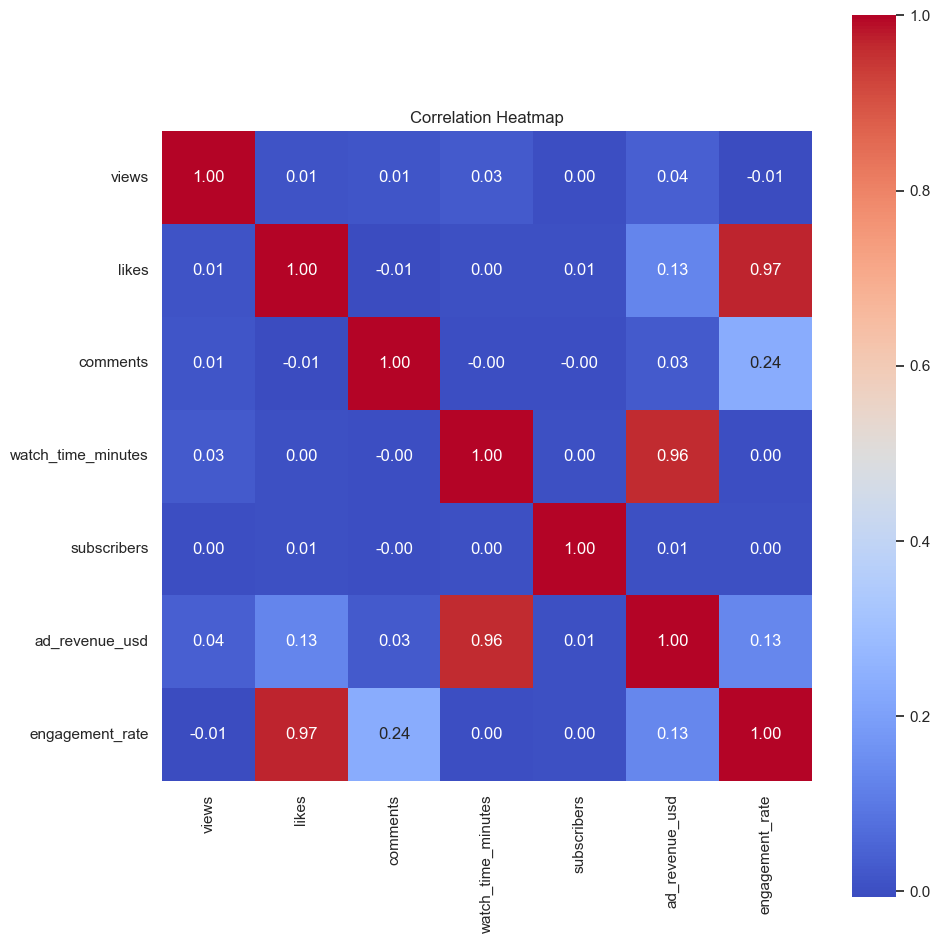

In [751]:
numerics_df = df.select_dtypes(include=['number'])
corr = numerics_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Feature Scaling

In [752]:
# 2. Define features and target
X=df.drop('ad_revenue_usd',axis=1) # independent variable / Features / X
Y=df['ad_revenue_usd'] # dependent variable / Target/Label / y

In [753]:
df=pd.concat([X,Y],axis=1)
df

views   likes  comments  watch_time_minutes  subscribers  \
0        9936  1221.0     320.0         26497.21418       228086   
1       10017   642.0     346.0         15209.74744       736015   
2       10097  1979.0     187.0         57332.65850       240534   
3       10034  1191.0     242.0         31334.51777       434482   
4        9889  1858.0     477.0         15665.66643        42030   
...       ...     ...       ...                 ...          ...   
122395   9853  1673.0     147.0         42075.70489       210818   
122396  10128  1709.0      63.0         57563.70304       878860   
122397  10267   700.0       0.0         27549.71466       576756   
122398  10240  1616.0     106.0         56967.38438       585138   
122399   9931   770.0       0.0         38466.83714       517587   

             category   device country  engagement_rate  ad_revenue_usd  
0       Entertainment       TV      IN         0.155093      203.178237  
1              Gaming   Tablet      CA         0.098632      140.880508  
2           Education       TV      CA         0.214519      360.134007  
3       Entertainment   Mobile      UK         0.142814      224.638261  
4           Education   Mobile      CA         0.236121      165.514388  
...               ...      ...     ...              ...             ...  
122395      Education   Tablet      US         0.184715      280.986396  
122396          Music  Desktop      UK         0.174961      354.612981  
122397           Tech   Tablet      CA         0.068180      203.643106  
122398          Music   Mobile      UK         0.168164      351.525811  
122399           Tech       TV      CA         0.077535      253.842824  

[120000 rows x 10 columns]

In [754]:
df.to_csv("D:\Studys\GUVI\GUVI Project\Content Monetization Modeler\Content Monetization Modeler_python_code\.venv\code\preprocessing.csv", index=False)